In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [2]:
# Download dataset

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-25 13:47:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70% 93.5K 0s
    50K .......... ..........                                 100%  271K=0.6s

2020-07-25 13:47:34 (116 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
# readinf the dataset

df = pd.read_csv('FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Select the features to use in the regression

cdf = df[['ENGINESIZE', 
          'CYLINDERS', 
          'FUELCONSUMPTION_CITY', 
          'FUELCONSUMPTION_HWY', 
          'FUELCONSUMPTION_COMB', 
          'CO2EMISSIONS']]

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


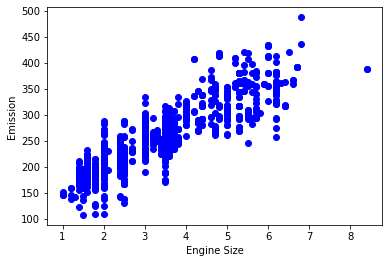

In [7]:
# create scatterplot

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')

plt.xlabel('Engine Size')
plt.ylabel('Emission')

plt.show()

In [8]:
# Creating train/test dataset

msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

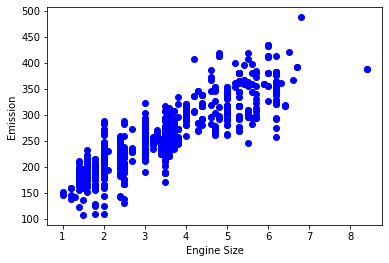

In [9]:
# Train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

plt.xlabel('Engine Size')
plt.ylabel('Emission')

plt.show()

## Multiple Regression Model

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

# The Coefficients

print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[11.38809508  6.96726569  9.69533091]]
Intercept:  [65.21891674]


### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. 

Minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output over all samples in the dataset.

OLS can find the best parameters using of the following methods:

- Solving the model parameters analytically using closed-form equations

- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Prediction

In [14]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual Sum of Squares: %.2f" %np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction

print("Variance score: %.2f" % regr.score(x, y))

Residual Sum of Squares: 581.10
Variance score: 0.86
